## 3. Úvod do lineární algebry
Důležitou částí studia na přírodovědecké fakultě je podobor matematiky zvaný lineární algebra. Poznatky tohoto oboru jsou základem pro oblasti jako zpracování obrazu,  strojové učení nebo návrh mechanických soustav s definovanou stabilitou. Základní úlohou v lineární algebře je nalezení neznámých v soustavě lineárních rovnic. Na hodinách jste byli obeznámeni s přímou a iterační metodou pro řešení soustav lineárních rovnic. Vaším úkolem je vytvořit graf, kde na ose x bude velikost čtvercové matice a na ose y průměrný čas potřebný k nalezení uspokojivého řešení. Cílem je nalézt takovou velikost matice, od které je výhodnější využít iterační metodu.

In [11]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import time, math

In [12]:
# funkce pro generovani matic
def gen_matrix(c, r=None, min=1, max=100):
    if not r:
        r = c
    nums = []
    for row in range(r):
        nums.append([randint(min, max) for col in range(c)])
            
    return np.array(nums)

# vynasobeni diagonaly konstantou
def multiply_diag(matrix, multiplier=1000000000):
    matrix[np.diag_indices_from(matrix)] *= multiplier
    return matrix

# funkce vyuzivajici iteracni metodu reseni
def jacobi(A, b, niteraci, x0=None):
    if not x0:
        x0 = np.ones(len(A))
    x = x0
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for i in range(niteraci):
        x = (b - np.matmul((L + U),x))/D
        #print("iterace:",i, "x=",x)
    return x

# funkce pro mereni uplynuleho casu
def measure_time(f, x):
    start = time.time()
    f(x)
    stop = time.time()
    return (stop - start) * 1000

t0 = measure_time(lambda x: math.sqrt(x), 16788888)
print(f'Výsledek měření č.0: {t0}ms')

def speed_test(matrices, f, x=None):
    vals = []
    for m1, m2 in matrices:
        t = measure_time(lambda x: f(x[0], x[1], x[2]), [m1, m2, x])
        vals.append(t)
    return vals

Výsledek měření č.0: 0.004291534423828125ms


In [15]:
# priprava nahodnych matic
minx = 2
maxx = 1000
step = 2
sizes = [n for n in range(minx, maxx, step)]
matrices = [[multiply_diag(gen_matrix(n)), gen_matrix(1,n)] for n in sizes]

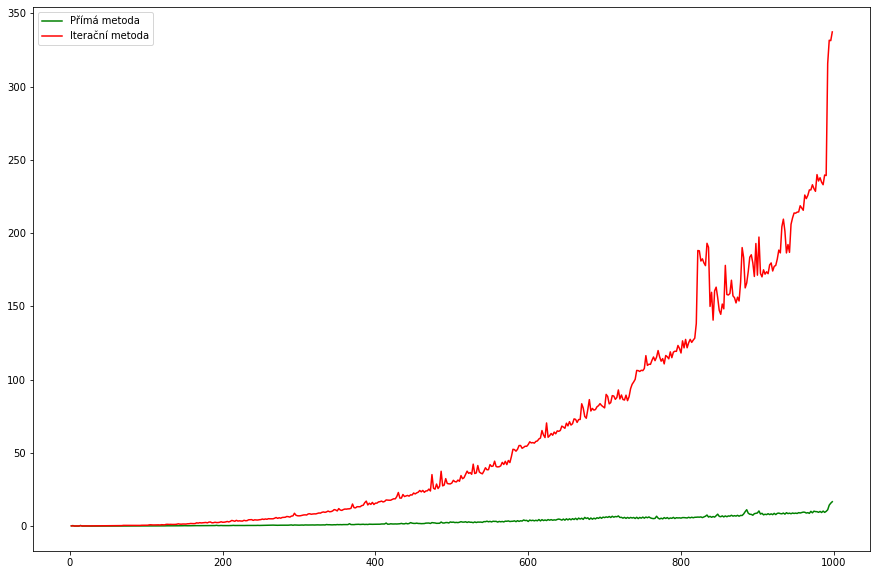

In [16]:
# testovani rychlosti
test_p = speed_test(matrices, lambda m1, m2, x=None: np.linalg.solve(m1, m2))
test_i = speed_test(matrices, lambda m1, m2, niteraci: jacobi(m1, m2, niteraci), x=10)

fig = plt.figure(figsize=(15,10))
x = sizes
plt.plot(x, test_p, 'g', label='Přímá metoda')
plt.plot(x, test_i, 'r', label='Iterační metoda')
plt.legend()
plt.show()